Best Lag for BUDGET_AMT: 12.0 months (Correlation = 0.70)


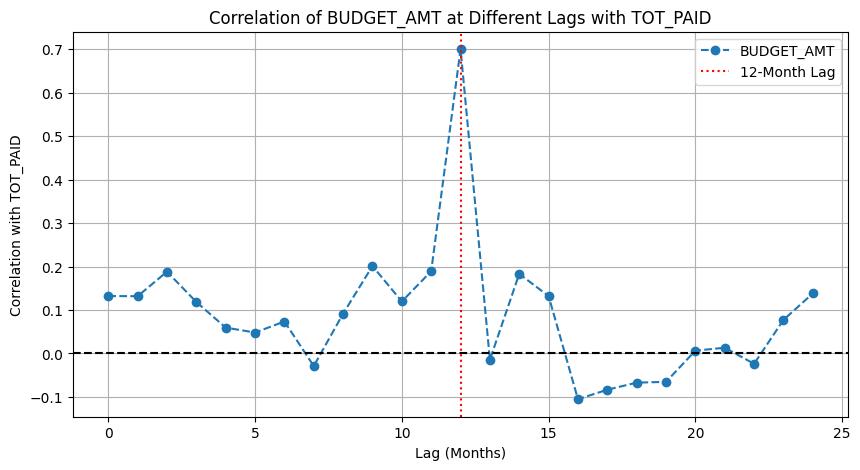

Best Lag for NBR_MURDER: 12.0 months (Correlation = 0.34)


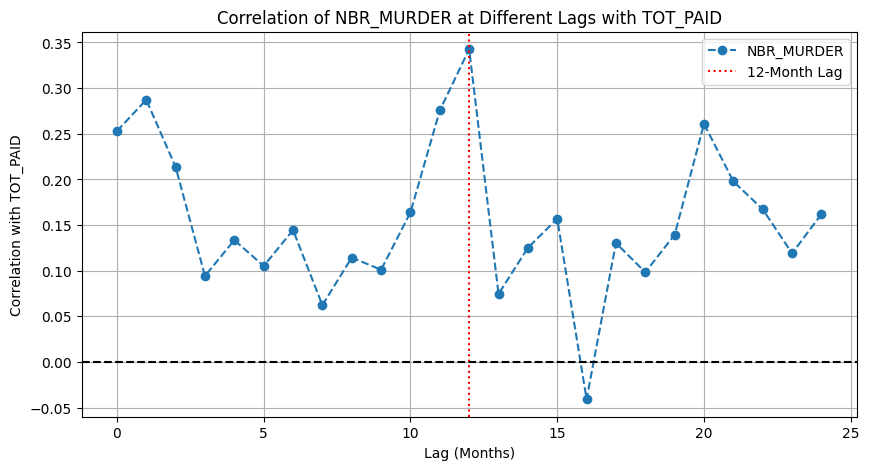

Best Lag for NBR_CASE: 12.0 months (Correlation = 0.53)


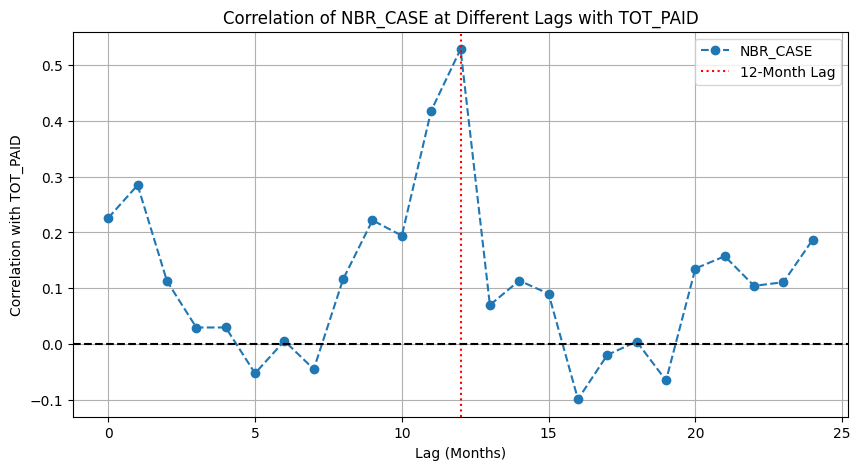


Running Granger Causality Test (Does BUDGET_AMT Granger-cause TOT_PAID?)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4384  , p=0.2321  , df_denom=163, df_num=1
ssr based chi2 test:   chi2=1.4649  , p=0.2262  , df=1
likelihood ratio test: chi2=1.4584  , p=0.2272  , df=1
parameter F test:         F=1.4384  , p=0.2321  , df_denom=163, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3848  , p=0.0954  , df_denom=160, df_num=2
ssr based chi2 test:   chi2=4.9187  , p=0.0855  , df=2
likelihood ratio test: chi2=4.8468  , p=0.0886  , df=2
parameter F test:         F=2.3848  , p=0.0954  , df_denom=160, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2312  , p=0.3003  , df_denom=157, df_num=3
ssr based chi2 test:   chi2=3.8583  , p=0.2772  , df=3
likelihood ratio test: chi2=3.8136  , p=0.2823  , df=3
parameter F test:         F=1.2312  , p=0.3003  , df_denom=157, df_num=3

Granger Causality
n

c:\GitHub\Machine-Learning\.venv\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\GitHub\Machine-Learning\.venv\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\GitHub\Machine-Learning\.venv\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load Dataset
data = pd.read_csv("C:\GitHub\Machine-Learning\data\Adjusted_DATA_2.csv")

# Convert ACC_MONTH to datetime and sort
data['ACC_MONTH'] = pd.to_datetime(data['ACC_MONTH'])
data = data.sort_values(by='ACC_MONTH')

# Select relevant columns
df = data[['ACC_MONTH', 'TOT_PAID', 'BUDGET_AMT', 'NBR_MURDER', 'NBR_CASE']].dropna()

# Function to test lag correlation analysis
def test_lag_correlation(target, regressor, max_lag=24):
    correlations = {}
    
    for lag in range(0, max_lag + 1):
        df[f'{regressor}_LAG_{lag}'] = df[regressor].shift(lag)
        correlations[lag] = df[[target, f'{regressor}_LAG_{lag}']].corr().iloc[0, 1]
    
    correlation_df = pd.DataFrame(list(correlations.items()), columns=['Lag (Months)', 'Correlation'])
    best_lag = correlation_df.iloc[correlation_df['Correlation'].abs().idxmax()]
    
    print(f"Best Lag for {regressor}: {best_lag['Lag (Months)']} months (Correlation = {best_lag['Correlation']:.2f})")
    
    plt.figure(figsize=(10, 5))
    plt.plot(correlation_df['Lag (Months)'], correlation_df['Correlation'], marker='o', linestyle='dashed', label=regressor)
    plt.axvline(x=12, color='red', linestyle='dotted', label="12-Month Lag")
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.xlabel("Lag (Months)")
    plt.ylabel("Correlation with TOT_PAID")
    plt.title(f"Correlation of {regressor} at Different Lags with TOT_PAID")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return best_lag

# Test lag correlation for BUDGET_AMT, NBR_MURDER, and NBR_CASE
best_budget_lag = test_lag_correlation('TOT_PAID', 'BUDGET_AMT')
best_murder_lag = test_lag_correlation('TOT_PAID', 'NBR_MURDER')
best_case_lag = test_lag_correlation('TOT_PAID', 'NBR_CASE')

# Run Granger Causality Test for each regressor
print("\nRunning Granger Causality Test (Does BUDGET_AMT Granger-cause TOT_PAID?)")
granger_budget = grangercausalitytests(df[['TOT_PAID', 'BUDGET_AMT']].dropna(), 12, verbose=True)

print("\nRunning Granger Causality Test (Does NBR_MURDER Granger-cause TOT_PAID?)")
granger_murder = grangercausalitytests(df[['TOT_PAID', 'NBR_MURDER']].dropna(), 12, verbose=True)

print("\nRunning Granger Causality Test (Does NBR_CASE Granger-cause TOT_PAID?)")
granger_case = grangercausalitytests(df[['TOT_PAID', 'NBR_CASE']].dropna(), 12, verbose=True)
